# CyberBullying using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cyberbullying_tweets.csv')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [3]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [4]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [5]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
df.duplicated().sum()

36

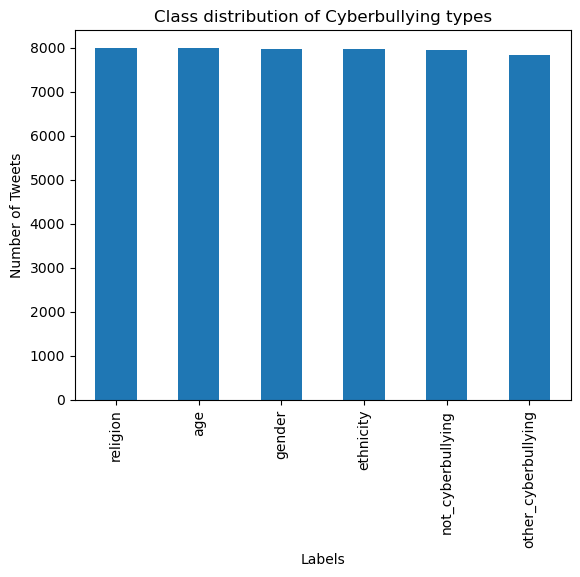

In [7]:
class_ounts=df['cyberbullying_type'].value_counts()
class_ounts.plot(kind='bar')
plt.title('Class distribution of Cyberbullying types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

In [8]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [9]:
texts=' '.join(df['tweet_text'].values)

In [10]:
texts=re.sub(r'http\S+',' ',texts)
texts=re.sub(r'@\S+',' ',texts)
texts=re.sub(r'#\S+',' ',texts)
words=texts.split()

In [11]:
stop_words=set(stopwords.words('english'))

In [12]:
filtered_words=[]
for word in words:
    if word not in stop_words:
        filtered_words.append(word)

In [13]:
word_counts=Counter(words)

In [14]:
top_words=word_counts.most_common(100)
top_words

[('the', 27563),
 ('a', 23320),
 ('to', 22697),
 ('and', 19689),
 ('I', 16040),
 ('of', 15011),
 ('in', 14043),
 ('you', 14030),
 ('is', 13190),
 ('that', 10338),
 ('are', 8451),
 ('for', 8192),
 ('school', 6681),
 ('was', 6326),
 ('me', 6285),
 ('not', 6280),
 ('my', 5845),
 ('it', 5780),
 ('on', 5747),
 ('be', 5250),
 ('like', 5249),
 ('with', 5147),
 ('who', 5086),
 ('but', 5034),
 ('about', 4748),
 ('high', 4645),
 ('have', 4630),
 ('this', 4607),
 ('they', 4576),
 ('dumb', 4387),
 ('bullied', 4266),
 ('as', 4198),
 ('RT', 4196),
 ('i', 4180),
 ('all', 4137),
 ('just', 3852),
 ('people', 3792),
 ('your', 3786),
 ('so', 3640),
 ('at', 3471),
 ('u', 3241),
 ('or', 3196),
 ('by', 3153),
 ('rape', 3021),
 ('fuck', 3019),
 ('if', 2855),
 ('when', 2827),
 ('one', 2786),
 ('from', 2779),
 ('he', 2726),
 ('bully', 2725),
 ('gay', 2686),
 ('do', 2668),
 ('an', 2622),
 ('&amp;', 2599),
 ('up', 2563),
 ('what', 2558),
 ('being', 2542),
 ('The', 2523),
 ('get', 2504),
 ('You', 2477),
 ('nigger

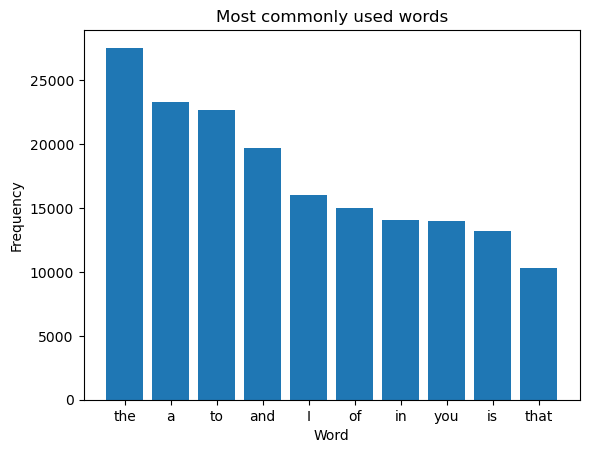

In [15]:
top_words=word_counts.most_common(10)
x_values=[]
y_values=[]

for word in top_words:
    x_values.append(word[0])
    y_values.append(word[1])
plt.bar(x_values,y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most commonly used words')
plt.show()

In [16]:
import spacy
from spacy import displacy

In [17]:
text=df['tweet_text'].iloc[1]
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

In [18]:
from nltk.stem.porter import PorterStemmer

In [19]:
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    words = nltk.word_tokenize(text)
    
    filtered_words = []
    for w in words:
        if w not in stopwords.words('english'):
            filtered_words.append(w)
    
    stemmer = PorterStemmer()
    stemmed_words = []
    for w in filtered_words:
        stemmed_words.append(stemmer.stem(w))

    cleaned_text = ' '.join(stemmed_words)
    return cleaned_text

In [20]:
from tqdm.auto import tqdm

In [21]:
tqdm.pandas()

In [22]:
df['cleaned_text'] = df['tweet_text'].progress_apply(clean_text)

  0%|          | 0/47692 [00:00<?, ?it/s]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text'])
y = df['cyberbullying_type']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter = 1000)

In [27]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict(X_test)
y_pred

array(['ethnicity', 'gender', 'ethnicity', ..., 'other_cyberbullying',
       'religion', 'gender'], dtype=object)

In [29]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8245037741123847


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2296,    2,    5,   27,   19,    0],
       [   5, 2360,    5,   13,   26,    9],
       [   3,    4, 1987,  165,  177,    7],
       [  38,    6,   95, 1398,  858,   71],
       [  23,    7,  104,  700, 1549,    8],
       [   2,    5,    7,  100,   20, 2207]], dtype=int64)

<Axes: >

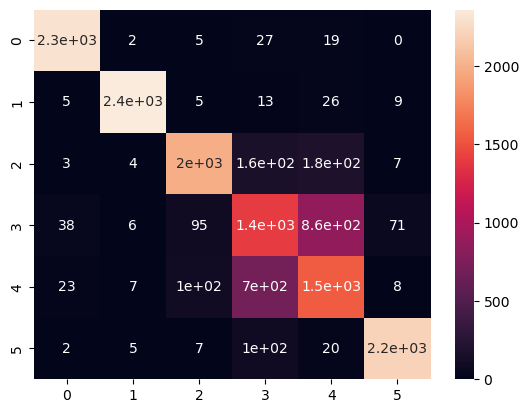

In [31]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [32]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

                age       0.97      0.98      0.97      2349
          ethnicity       0.99      0.98      0.98      2418
             gender       0.90      0.85      0.87      2343
  not_cyberbullying       0.58      0.57      0.57      2466
other_cyberbullying       0.58      0.65      0.61      2391
           religion       0.96      0.94      0.95      2341

           accuracy                           0.82     14308
          macro avg       0.83      0.83      0.83     14308
       weighted avg       0.83      0.82      0.83     14308

